In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
data = pd.read_csv(r"amz.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [58]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [59]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [60]:
data['feedback'].value_counts()

,count
feedback,
1,2893
0,257


In [61]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [62]:
# drop the collum which are null
data[data['verified_reviews'].isnull()]
data.dropna(inplace=True)

In [63]:
data['length'] = data['verified_reviews'].apply(len)

In [64]:
data.head(5)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [65]:
# randomly chacking of 10th record and print all thet
print(data.iloc[10])
print(len(data.iloc[10]['verified_reviews']))


rating                                                              5
date                                                        30-Jul-18
variation                                            Charcoal Fabric 
verified_reviews    "I sent it to my 85 year old Dad, and he talks...
feedback                                                            1
length                                                             65
Name: 10, dtype: object
65


In [66]:
# randomly chacking of 10th record and print all thet
print(data.iloc[5])
print(len(data.iloc[5]['verified_reviews']))

rating                                                              5
date                                                        31-Jul-18
variation                                        Heather Gray Fabric 
verified_reviews    "I received the echo as a gift. I needed anoth...
feedback                                                            1
length                                                            174
Name: 5, dtype: object
174


In [67]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


In [68]:
data['rating'].value_counts()

,count
rating,
5,2286
4,455
1,161
3,152
2,95


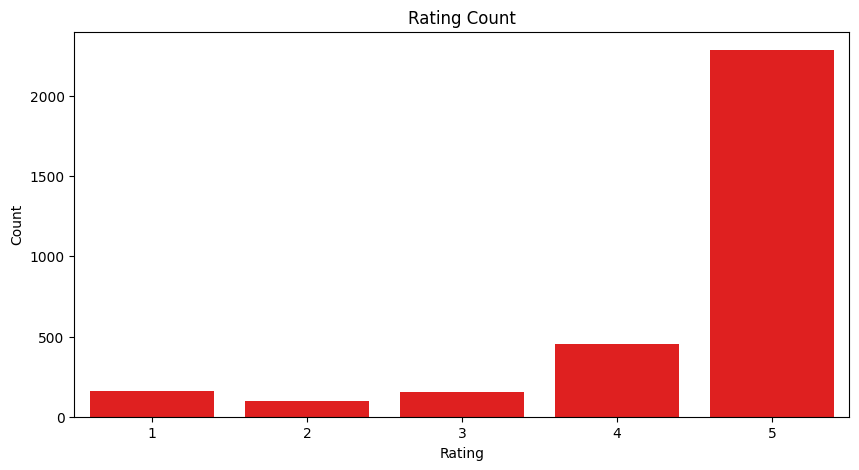

In [69]:
# make a graph based on rating count
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=data, color="RED")
plt.title("Rating Count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [70]:
# calculate percentage of that
data['rating'].value_counts(normalize=True)

,proportion
rating,
5,0.725945
4,0.144490
1,0.051127
3,0.048269
2,0.030168


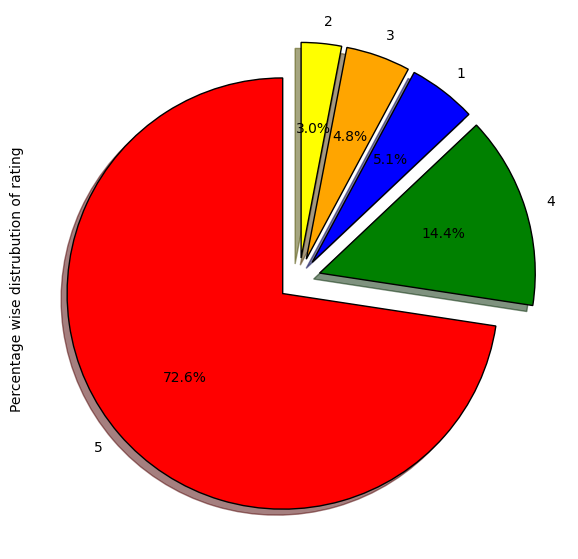

In [71]:
# make a pie chart with based on rating count with different colour
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [72]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [73]:
# i want to see  first record of feedback 0
data[data['feedback'] == 0 ].iloc[1]['verified_reviews']

'Sound is terrible if u want good music too get a bose'

In [74]:
data[data['feedback'] == 1 ].iloc[1]['verified_reviews']

'Loved it!'

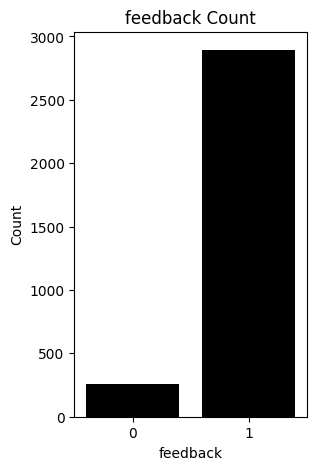

In [75]:
# make a graph based on feedback count
plt.figure(figsize=(3,5))
sns.countplot(x='feedback', data=data, color="BLACK")
plt.title("feedback Count")
plt.xlabel("feedback")
plt.ylabel("Count")
plt.show()

In [76]:
# calculate percentage of that
data['feedback'].value_counts(normalize=True)

,proportion
feedback,
1,0.918704
0,0.081296


<Axes: ylabel='Percentage wise distrubution of feedback'>

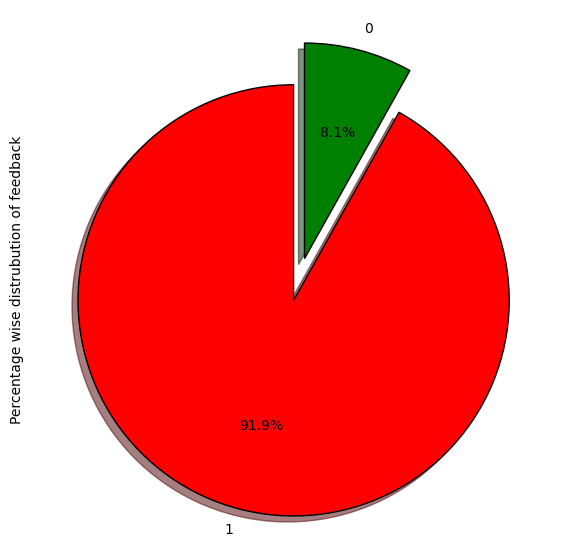

In [77]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [78]:

data[data['feedback'] == 0 ]['rating'].value_counts()

,count
rating,
1,161
2,95


In [79]:
data[data['feedback'] == 1 ]['rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


In [81]:
# analysis the veriation of collum
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{data['variation'].value_counts()}")


Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


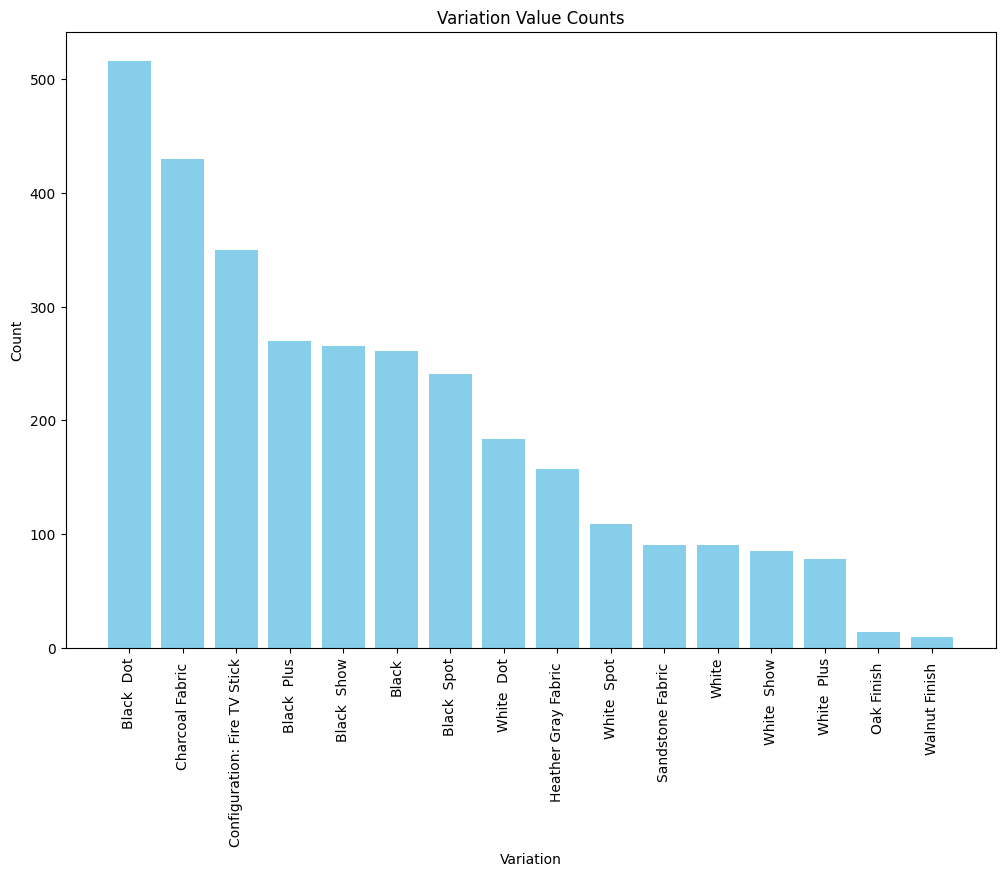

In [82]:
# bar graph of total count of variation collumn
# Assuming your DataFrame is named 'data'
variation_counts = data['variation'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(variation_counts.index, variation_counts.values, color='skyblue')

# Add title and labels
plt.title('Variation Value Counts')
plt.xlabel('Variation')
plt.ylabel('Count')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [91]:
data.groupby('variation')['rating'].mean()

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


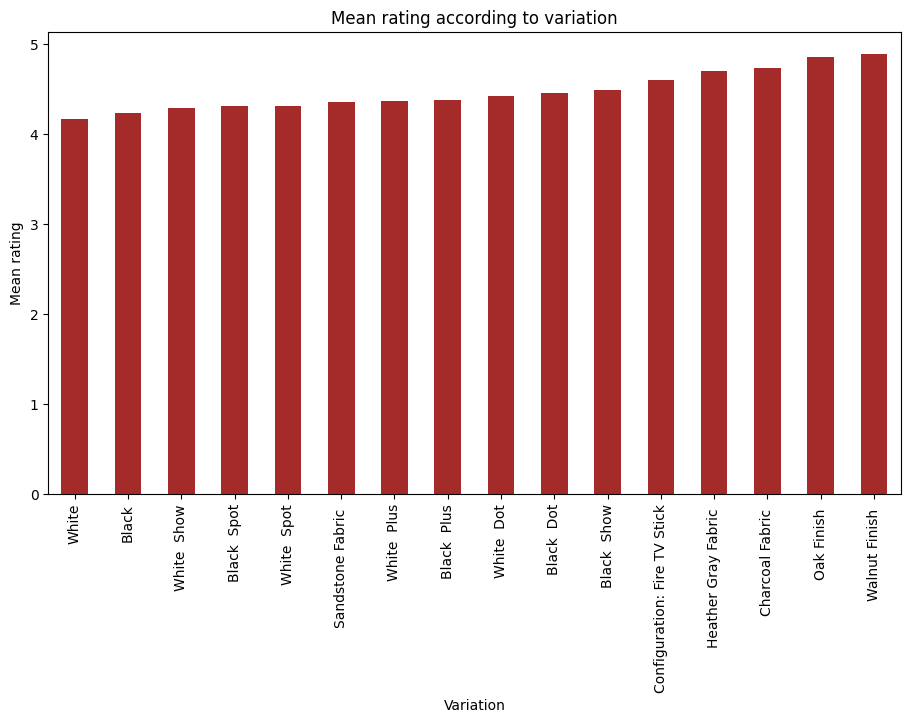

In [92]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [93]:
# nlp
# CountVectorizer
crt = CountVectorizer(stop_words='english')
crt_matrix = crt.fit_transform(data['verified_reviews'])

In [131]:
print(crt_matrix.shape)

(3149, 3784)


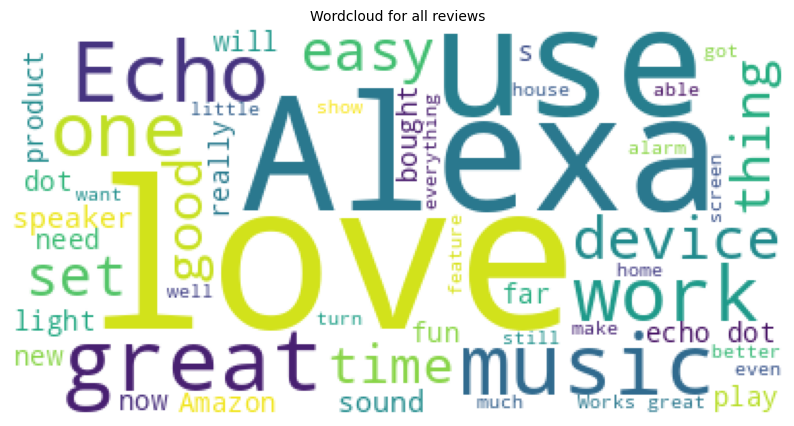

In [94]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [95]:
# show like negetive reviews
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


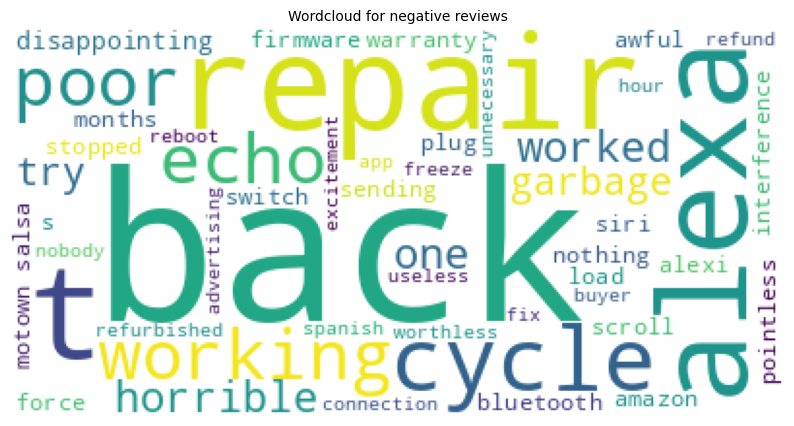

In [96]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

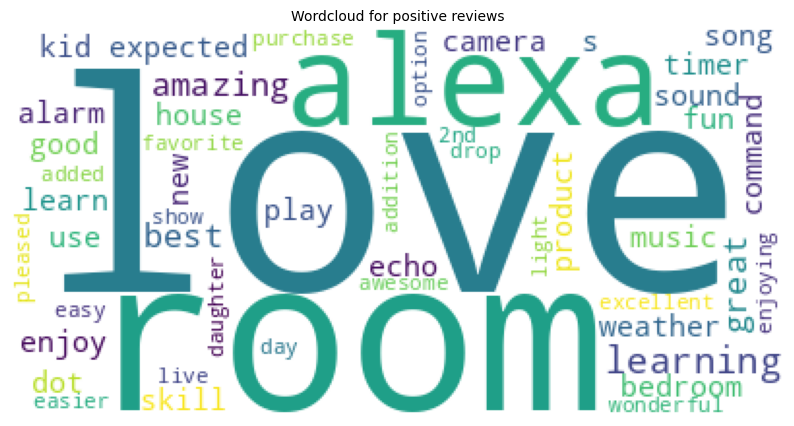

In [98]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [115]:
from nltk.stem import SnowballStemmer
# sno = SnowballStemmer(language='english')

In [117]:
corpus = []
stemmer = SnowballStemmer(language = 'english')
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [118]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [119]:
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [120]:
print(X.shape)
print(y.shape)

(3149, 2500)
(3149,)


In [121]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [122]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2204, 2500)
(2204,)
(945, 2500)
(945,)


In [123]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [124]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [125]:
# random forest classification
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scl, y_train)

RandomForestClassifier(random_state=42)

In [126]:
# print accuracy for training and testing
print(f"Training accuracy: {rf.score(X_train_scl, y_train)}")
print(f"Testing accuracy: {rf.score(X_test_scl, y_test)}")


Training accuracy: 0.9927404718693285
Testing accuracy: 0.9248677248677248


In [127]:
# import svm
from sklearn.svm import SVC

In [128]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scl, y_train)

SVC(kernel='linear', random_state=42)

In [129]:
# accuracy
print(f"Training accuracy: {svm.score(X_train_scl, y_train)}")
print(f"Testing accuracy: {svm.score(X_test_scl, y_test)}")

Training accuracy: 0.984573502722323
Testing accuracy: 0.926984126984127
